In [1]:
#Import some basic libraries
import numpy as np
import pandas as pd
import numpy as nm 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('./kerala.csv')
df

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,KERALA,2014,4.6,10.3,17.9,95.7,251.0,454.4,677.8,733.9,298.8,355.5,99.5,47.2,3046.4,YES
114,KERALA,2015,3.1,5.8,50.1,214.1,201.8,563.6,406.0,252.2,292.9,308.1,223.6,79.4,2600.6,NO
115,KERALA,2016,2.4,3.8,35.9,143.0,186.4,522.2,412.3,325.5,173.2,225.9,125.4,23.6,2176.6,NO
116,KERALA,2017,1.9,6.8,8.9,43.6,173.5,498.5,319.6,531.8,209.5,192.4,92.5,38.1,2117.1,NO


# Analyzing the Dataset

In [3]:
df.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000
mean,1959.500000,12.218644,15.633898,36.670339,110.330508,228.644915,651.617797,698.220339,430.369492,246.207627,293.207627,162.311017,40.009322,2925.405085
std,34.207699,15.473766,16.406290,30.063862,44.633452,147.548778,186.181363,228.988966,181.980463,121.901131,93.705253,83.200485,36.676330,452.169407
min,1901.000000,0.000000,0.000000,0.100000,13.100000,53.400000,196.800000,167.500000,178.600000,41.300000,68.500000,31.500000,0.100000,2068.800000
25%,1930.250000,2.175000,4.700000,18.100000,74.350000,125.050000,535.550000,533.200000,316.725000,155.425000,222.125000,93.025000,10.350000,2613.525000
50%,1959.500000,5.800000,8.350000,28.400000,110.400000,184.600000,625.600000,691.650000,386.250000,223.550000,284.300000,152.450000,31.100000,2934.300000
75%,1988.750000,18.175000,21.400000,49.825000,136.450000,264.875000,786.975000,832.425000,500.100000,334.500000,355.150000,218.325000,54.025000,3170.400000
max,2018.000000,83.500000,79.000000,217.200000,238.000000,738.800000,1098.200000,1526.500000,1398.900000,526.700000,567.900000,365.600000,202.300000,4473.000000


In [4]:
df.info

<bound method DataFrame.info of     SUBDIVISION  YEAR   JAN   FEB   MAR    APR    MAY     JUN     JUL     AUG  \
0        KERALA  1901  28.7  44.7  51.6  160.0  174.7   824.6   743.0   357.5   
1        KERALA  1902   6.7   2.6  57.3   83.9  134.5   390.9  1205.0   315.8   
2        KERALA  1903   3.2  18.6   3.1   83.6  249.7   558.6  1022.5   420.2   
3        KERALA  1904  23.7   3.0  32.2   71.5  235.7  1098.2   725.5   351.8   
4        KERALA  1905   1.2  22.3   9.4  105.9  263.3   850.2   520.5   293.6   
..          ...   ...   ...   ...   ...    ...    ...     ...     ...     ...   
113      KERALA  2014   4.6  10.3  17.9   95.7  251.0   454.4   677.8   733.9   
114      KERALA  2015   3.1   5.8  50.1  214.1  201.8   563.6   406.0   252.2   
115      KERALA  2016   2.4   3.8  35.9  143.0  186.4   522.2   412.3   325.5   
116     KERALA   2017   1.9   6.8   8.9   43.6  173.5   498.5   319.6   531.8   
117      KERALA  2018  29.1  52.1  48.6  116.4  183.8   625.4  1048.5  1398.9

In [5]:
df.cov()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL
YEAR,1170.166667,-119.378632,2.176923,-13.207265,132.625641,-301.126068,-1114.149145,-1749.953846,274.983761,448.915812,-96.876496,-370.360256,-155.123504,-3063.344444
JAN,-119.378632,239.437427,4.979192,36.577053,24.039512,163.062403,545.574281,121.970900,24.434163,-214.094844,-50.812451,-14.205421,-50.968209,830.154092
FEB,2.176923,4.979192,269.166362,121.027766,90.585966,-202.129655,165.293580,21.748364,69.442838,132.629654,81.684355,-222.332684,-76.434079,455.913330
MAR,-13.207265,36.577053,121.027766,903.835779,99.315784,-456.721990,106.348567,126.186249,232.033874,527.184758,-64.980285,-81.573089,28.990108,1578.305793
APR,132.625641,24.039512,90.585966,99.315784,1992.145044,-754.490185,606.540393,153.070058,-388.591540,70.336859,473.330962,82.464276,-180.710372,2267.590185
MAY,-301.126068,163.062403,-202.129655,-456.721990,-754.490185,21770.641812,33.929279,-1571.703571,-3340.586652,2101.892304,2725.149056,1165.417193,-638.978371,20997.420795
JUN,-1114.149145,545.574281,165.293580,106.348567,606.540393,33.929279,34663.499937,4047.567071,-492.944239,-1194.576633,20.161145,247.329460,-581.699654,38170.332986
JUL,-1749.953846,121.970900,21.748364,126.186249,153.070058,-1571.703571,4047.567071,52435.946420,6436.876865,5846.347194,541.214459,-543.479371,-113.988396,67508.201520
AUG,274.983761,24.434163,69.442838,232.033874,-388.591540,-3340.586652,-492.944239,6436.876865,33116.888805,2178.762799,-3094.959423,-1706.808293,948.365073,33987.052721
SEP,448.915812,-214.094844,132.629654,527.184758,70.336859,2101.892304,-1194.576633,5846.347194,2178.762799,14859.885839,-369.500828,-280.077350,-49.210243,23610.285602


In [6]:
df.corr()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL
YEAR,1.000000,-0.225531,0.003879,-0.012842,0.086865,-0.059661,-0.174938,-0.223403,0.044173,0.107655,-0.030223,-0.130129,-0.123643,-0.198048
JAN,-0.225531,1.000000,0.019613,0.078626,0.034807,0.071420,0.189375,0.034423,0.008677,-0.113502,-0.035044,-0.011034,-0.089809,0.118648
FEB,0.003879,0.019613,1.000000,0.245375,0.123706,-0.083500,0.054114,0.005789,0.023259,0.066317,0.053133,-0.162880,-0.127025,0.061457
MAR,-0.012842,0.078626,0.245375,1.000000,0.074014,-0.102961,0.019000,0.018330,0.042411,0.143850,-0.023066,-0.032612,0.026292,0.116103
APR,0.086865,0.034807,0.123706,0.074014,1.000000,-0.114566,0.072990,0.014977,-0.047842,0.012928,0.113172,0.022206,-0.110392,0.112358
MAY,-0.059661,0.071420,-0.083500,-0.102961,-0.114566,1.000000,0.001235,-0.046518,-0.124412,0.116860,0.197102,0.094934,-0.118077,0.314723
JUN,-0.174938,0.189375,0.054114,0.019000,0.072990,0.001235,1.000000,0.094939,-0.014549,-0.052634,0.001156,0.015967,-0.085188,0.453407
JUL,-0.223403,0.034423,0.005789,0.018330,0.014977,-0.046518,0.094939,1.000000,0.154467,0.209441,0.025223,-0.028526,-0.013573,0.651990
AUG,0.044173,0.008677,0.023259,0.042411,-0.047842,-0.124412,-0.014549,0.154467,1.000000,0.098215,-0.181496,-0.112729,0.142090,0.413036
SEP,0.107655,-0.113502,0.066317,0.143850,0.012928,0.116860,-0.052634,0.209441,0.098215,1.000000,-0.032348,-0.027615,-0.011007,0.428344


In [7]:
#Now we will cheak if any colomns is left empty
df.apply(lambda x:sum(x.isnull()), axis=0)

SUBDIVISION         0
YEAR                0
JAN                 0
FEB                 0
MAR                 0
APR                 0
MAY                 0
JUN                 0
JUL                 0
AUG                 0
SEP                 0
OCT                 0
NOV                 0
DEC                 0
 ANNUAL RAINFALL    0
FLOODS              0
dtype: int64

In [8]:
# replacing the yes/no in floods coloumn by 1/0
df['FLOODS'].replace(['YES','NO'],[1,0],inplace=True)
df

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,1
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,1
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,1
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,1
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,KERALA,2014,4.6,10.3,17.9,95.7,251.0,454.4,677.8,733.9,298.8,355.5,99.5,47.2,3046.4,1
114,KERALA,2015,3.1,5.8,50.1,214.1,201.8,563.6,406.0,252.2,292.9,308.1,223.6,79.4,2600.6,0
115,KERALA,2016,2.4,3.8,35.9,143.0,186.4,522.2,412.3,325.5,173.2,225.9,125.4,23.6,2176.6,0
116,KERALA,2017,1.9,6.8,8.9,43.6,173.5,498.5,319.6,531.8,209.5,192.4,92.5,38.1,2117.1,0


In [9]:
df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,1
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,1
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,1
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,1
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,0


In [10]:
# Seperating the data which we are gonna use for prediction.
x=df.iloc[:,1:14]
x.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4
1,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5
2,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0
3,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3
4,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2


In [11]:
# Now seperate the flood label from the dataset.
y=df.iloc[:,-1]
y

0      1
1      1
2      1
3      1
4      0
      ..
113    1
114    0
115    0
116    0
117    1
Name: FLOODS, Length: 118, dtype: int64

In [12]:
y=df.iloc[:,-1].values
y

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1])

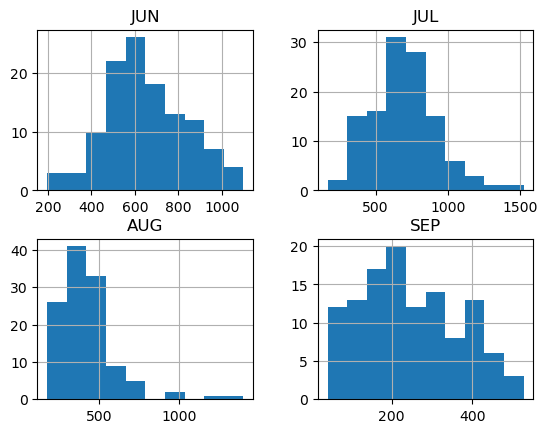

In [13]:
import matplotlib.pyplot as plt   
%matplotlib inline                   
c=df[['JUN','JUL','AUG','SEP']]

c.hist()
plt.show()



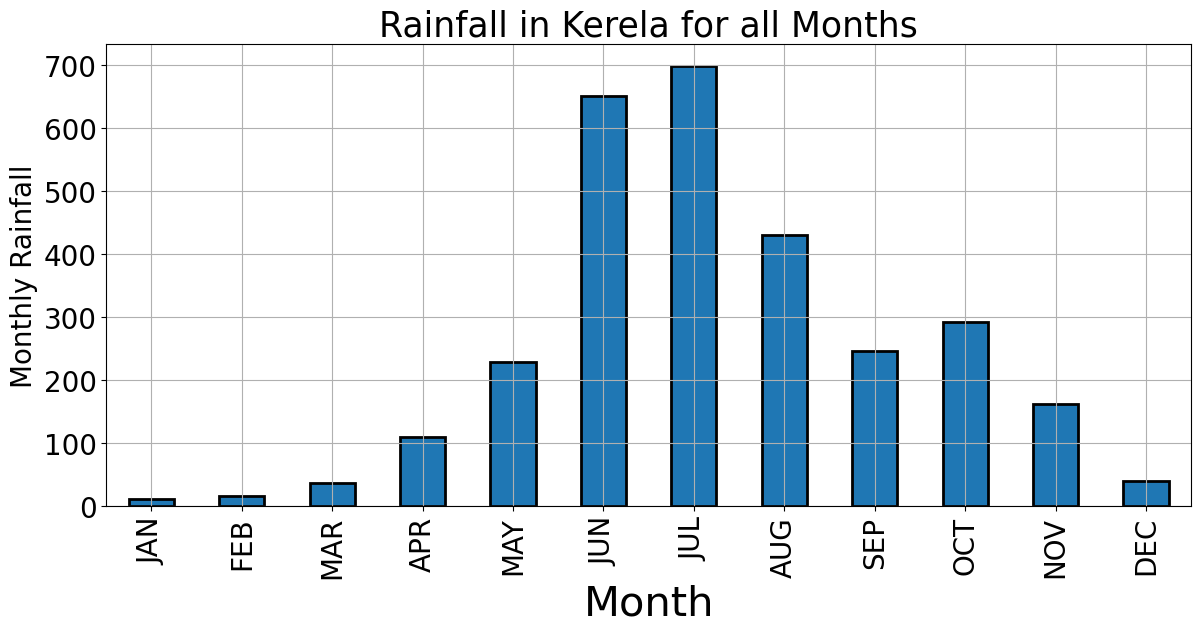

In [14]:
ax = df[['JAN', 'FEB', 'MAR', 'APR','MAY','JUN','JUL','AUG', 'SEP', 'OCT','NOV','DEC']].mean().plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2,figsize=(14,6))
plt.xlabel('Month',fontsize=30)
plt.ylabel('Monthly Rainfall',fontsize=20)
plt.title('Rainfall in Kerela for all Months',fontsize=25)
ax.tick_params(labelsize=20)
plt.grid()
plt.ioff()

# Using sklearn to develop the ML Model

In [15]:
# Scaling the data between 0 and 1.
from sklearn import preprocessing
minmax = preprocessing.MinMaxScaler(feature_range=(0,0.5))
minmax
minmax.fit(x).transform(x)

array([[0.        , 0.17185629, 0.28291139, ..., 0.19863837, 0.47785094,
        0.1194362 ],
       [0.0042735 , 0.04011976, 0.0164557 , ..., 0.2902483 , 0.18976354,
        0.30019782],
       [0.00854701, 0.01916168, 0.11772152, ..., 0.28594313, 0.18781802,
        0.14564787],
       ...,
       [0.49145299, 0.01437126, 0.02405063, ..., 0.15758911, 0.14052679,
        0.05811078],
       [0.4957265 , 0.01137725, 0.04303797, ..., 0.12404886, 0.09129003,
        0.09396637],
       [0.5       , 0.1742515 , 0.32974684, ..., 0.28794553, 0.14052679,
        0.16073195]])

In [16]:
# dividing the dataset into training dataset and test dataset
from sklearn import model_selection,neighbors
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
18,1919,43.0,6.1,33.9,65.9,247.0,636.8,648.0,484.2,255.9,249.2,280.1,53.0
103,2004,2.4,8.1,37.9,113.2,610.9,673.4,385.4,417.9,192.8,320.6,120.7,2.7
49,1950,0.1,53.7,31.1,68.5,242.0,638.3,905.7,387.3,411.6,250.4,149.2,8.8
76,1977,1.1,15.7,28.3,102.3,306.4,599.6,753.3,234.2,201.3,437.0,361.7,6.7
81,1982,0.7,0.1,21.9,60.4,148.2,612.2,511.5,495.0,70.6,164.4,127.5,10.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,1961,13.7,31.3,11.4,94.1,500.5,1005.2,1146.5,678.3,399.3,274.2,85.9,17.5
64,1965,9.1,0.9,28.3,109.8,214.5,597.7,465.1,296.1,150.1,183.7,131.7,155.5
73,1974,1.6,5.4,16.0,128.0,221.5,266.9,1004.2,533.6,383.6,142.1,61.0,3.6
25,1926,28.6,5.8,23.1,55.8,222.6,563.9,885.2,536.0,322.7,216.7,88.8,16.2


In [17]:
x_train.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
18,1919,43.0,6.1,33.9,65.9,247.0,636.8,648.0,484.2,255.9,249.2,280.1,53.0
103,2004,2.4,8.1,37.9,113.2,610.9,673.4,385.4,417.9,192.8,320.6,120.7,2.7
49,1950,0.1,53.7,31.1,68.5,242.0,638.3,905.7,387.3,411.6,250.4,149.2,8.8
76,1977,1.1,15.7,28.3,102.3,306.4,599.6,753.3,234.2,201.3,437.0,361.7,6.7
81,1982,0.7,0.1,21.9,60.4,148.2,612.2,511.5,495.0,70.6,164.4,127.5,10.8


In [18]:
x_train.dtypes

YEAR      int64
JAN     float64
FEB     float64
MAR     float64
APR     float64
MAY     float64
JUN     float64
JUL     float64
AUG     float64
SEP     float64
OCT     float64
NOV     float64
DEC     float64
dtype: object

In [19]:
x_test

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
91,1992,2.4,0.9,0.1,43.0,218.4,819.3,767.8,508.0,297.5,290.7,287.6,3.7
47,1948,43.0,8.3,48.2,125.0,212.3,910.2,619.0,487.9,166.6,183.9,215.6,19.2
7,1908,8.0,20.8,38.2,102.9,142.6,592.6,902.2,352.9,175.9,253.3,47.9,11.0
70,1971,31.6,18.5,20.0,113.0,317.5,889.6,648.6,385.2,331.2,220.9,38.3,62.3
115,2016,2.4,3.8,35.9,143.0,186.4,522.2,412.3,325.5,173.2,225.9,125.4,23.6
89,1990,14.9,4.8,18.0,41.8,488.5,528.6,635.4,370.8,103.3,323.2,158.8,5.2
43,1944,6.4,26.6,61.6,61.6,212.7,498.9,614.1,230.7,155.0,289.0,244.1,89.2
112,2013,3.9,40.1,49.9,49.3,119.3,1042.7,830.2,369.7,318.6,259.9,154.9,17.0
98,1999,1.8,23.8,21.4,111.6,453.2,607.3,700.4,266.3,88.0,567.9,68.1,4.9
87,1988,0.8,17.5,38.1,177.6,157.2,511.3,502.8,379.8,451.7,68.5,67.0,31.1


In [20]:
x_test.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
91,1992,2.4,0.9,0.1,43.0,218.4,819.3,767.8,508.0,297.5,290.7,287.6,3.7
47,1948,43.0,8.3,48.2,125.0,212.3,910.2,619.0,487.9,166.6,183.9,215.6,19.2
7,1908,8.0,20.8,38.2,102.9,142.6,592.6,902.2,352.9,175.9,253.3,47.9,11.0
70,1971,31.6,18.5,20.0,113.0,317.5,889.6,648.6,385.2,331.2,220.9,38.3,62.3
115,2016,2.4,3.8,35.9,143.0,186.4,522.2,412.3,325.5,173.2,225.9,125.4,23.6


In [21]:
# type casting
y_train=y_train.astype('int')
y_train

array([1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0])

In [22]:
y_test=y_test.astype('int')
y_test

array([1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0])

# Create KNN (K Neighrest Neighbour Classifier) to predict

In [23]:
clf=neighbors.KNeighborsClassifier()
clf.fit(x_train,y_train)

KNeighborsClassifier()

In [24]:
#predict chance of flood
y_predict=clf.predict(x_test)
print("Predicted Values for the floods:")
y_predict

Predicted Values for the floods:


array([1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0])

In [25]:
print("Actual Values for the Floods:")
print(y_test)

Actual Values for the Floods:
[1 1 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 1 0 1 1 0]


In [26]:
print("List of the Predicted Values:")
print(y_predict)

List of the Predicted Values:
[1 1 0 1 0 1 0 1 1 0 1 1 0 1 0 0 0 1 0 1 0 0 1 0]


In [27]:
from sklearn.model_selection import cross_val_score,cross_val_predict
x_train_std=minmax.fit_transform(x_train)
x_test_std=minmax.fit_transform(x_test)
knn_acc=cross_val_score(clf,x_train_std,y_train,cv=3,scoring='accuracy',n_jobs=-1)
knn_proba=cross_val_predict(clf,x_train_std,y_train,cv=3,method='predict_proba')


/home/hpcap/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/hpcap/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted

In [28]:


knn_acc



array([0.78125   , 0.70967742, 0.83870968])

In [29]:
knn_proba


array([[0.4, 0.6],
       [0.6, 0.4],
       [0.4, 0.6],
       [0.6, 0.4],
       [1. , 0. ],
       [0.2, 0.8],
       [0. , 1. ],
       [0.4, 0.6],
       [0.8, 0.2],
       [0.6, 0.4],
       [0.8, 0.2],
       [0.4, 0.6],
       [0.4, 0.6],
       [0.8, 0.2],
       [1. , 0. ],
       [0.8, 0.2],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.4, 0.6],
       [1. , 0. ],
       [0.2, 0.8],
       [0. , 1. ],
       [0.6, 0.4],
       [0.8, 0.2],
       [0.4, 0.6],
       [0.8, 0.2],
       [0.4, 0.6],
       [0. , 1. ],
       [1. , 0. ],
       [0.4, 0.6],
       [0.8, 0.2],
       [0.2, 0.8],
       [0.6, 0.4],
       [1. , 0. ],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.2, 0.8],
       [0.8, 0.2],
       [0.2, 0.8],
       [0.8, 0.2],
       [0. , 1. ],
       [1. , 0. ],
       [0.8, 0.2],
       [0.2, 0.8],
       [1. , 0. ],
       [0.2, 0.8],
       [0.6, 0.4],
       [0.2, 0.8],
       [0.8, 0.2],
       [1. , 0. ],
       [0. , 1. ],
       [0.8,

In [30]:


from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\nAccuracy Score:%f"%(accuracy_score(y_test,y_predict)*100))
print("Recall Score:%f"%(recall_score(y_test,y_predict)*100))
print("ROC score:%f"%(roc_auc_score(y_test,y_predict)*100))
print(confusion_matrix(y_test,y_predict))




Accuracy Score:87.500000
Recall Score:90.909091
ROC score:87.762238
[[11  2]
 [ 1 10]]


# Logistic Regression to predict

In [62]:


x_train_std=minmax.fit_transform(x_train)#It is used to fit the values in between 0 and 1
y_train_std=minmax.transform(x_test)

from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr_acc=cross_val_score(lr,x_train_std,y_train,cv=3,scoring='accuracy',n_jobs=-1)
lr_proba=cross_val_predict(lr,x_train_std,y_train,cv=3,method='predict_proba')



In [63]:


lr_acc



array([0.71875   , 0.80645161, 0.90322581])

In [64]:


lr_proba



array([[0.41699561, 0.58300439],
       [0.5155499 , 0.4844501 ],
       [0.44084966, 0.55915034],
       [0.50862358, 0.49137642],
       [0.61497604, 0.38502396],
       [0.41707674, 0.58292326],
       [0.35271277, 0.64728723],
       [0.36264187, 0.63735813],
       [0.52592769, 0.47407231],
       [0.5049059 , 0.4950941 ],
       [0.49609132, 0.50390868],
       [0.38306107, 0.61693893],
       [0.53439556, 0.46560444],
       [0.51279184, 0.48720816],
       [0.52353046, 0.47646954],
       [0.5250727 , 0.4749273 ],
       [0.47296839, 0.52703161],
       [0.52489786, 0.47510214],
       [0.5127876 , 0.4872124 ],
       [0.50264194, 0.49735806],
       [0.60265214, 0.39734786],
       [0.38827036, 0.61172964],
       [0.41841838, 0.58158162],
       [0.52386759, 0.47613241],
       [0.52770985, 0.47229015],
       [0.40374305, 0.59625695],
       [0.47235826, 0.52764174],
       [0.49117222, 0.50882778],
       [0.27901331, 0.72098669],
       [0.59961875, 0.40038125],
       [0.

In [65]:
y_pred=lr.predict(x_test)
y_pred


array([1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0])

In [35]:


print(y_test)



[1 1 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 1 0 1 1 0]


In [36]:
print("List of the Predicted Values:")
print(y_pred)

List of the Predicted Values:
[1 1 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1 0 1 1 0]


# Accuracy and Efficiency of our Model

In [37]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("recall score:%f"%(recall_score(y_test,y_pred)*100))
print("roc score:%f"%(roc_auc_score(y_test,y_pred)*100))
print(confusion_matrix(y_test,y_pred))


accuracy score:91.666667
recall score:90.909091
roc score:91.608392
[[12  1]
 [ 1 10]]


# Support Vector Classification

In [38]:
from sklearn.svm import SVC
svc=SVC(kernel='rbf',probability=True)
svc_classifier=svc.fit(x_train,y_train)
svc_acc=cross_val_score(svc_classifier,x_train_std,y_train,cv=3,scoring="accuracy",n_jobs=-1)
svc_proba=cross_val_predict(svc_classifier,x_train_std,y_train,cv=3,method='predict_proba')


In [39]:


svc_acc



array([0.84375   , 0.74193548, 0.96774194])

In [40]:


svc_proba



array([[0.14051274, 0.85948726],
       [0.59346813, 0.40653187],
       [0.24659434, 0.75340566],
       [0.40467021, 0.59532979],
       [0.98139161, 0.01860839],
       [0.1086411 , 0.8913589 ],
       [0.00992567, 0.99007433],
       [0.1314186 , 0.8685814 ],
       [0.81916016, 0.18083984],
       [0.69093427, 0.30906573],
       [0.56732955, 0.43267045],
       [0.07594282, 0.92405718],
       [0.91637771, 0.08362229],
       [0.85240953, 0.14759047],
       [0.92388936, 0.07611064],
       [0.5489691 , 0.4510309 ],
       [0.5510318 , 0.4489682 ],
       [0.70249241, 0.29750759],
       [0.42318065, 0.57681935],
       [0.3618918 , 0.6381082 ],
       [0.9668725 , 0.0331275 ],
       [0.07172441, 0.92827559],
       [0.11912049, 0.88087951],
       [0.59866021, 0.40133979],
       [0.8552407 , 0.1447593 ],
       [0.17912069, 0.82087931],
       [0.51720702, 0.48279298],
       [0.51132406, 0.48867594],
       [0.01311997, 0.98688003],
       [0.97057846, 0.02942154],
       [0.

In [41]:
svc_scores=svc_proba[:,1]
svc_scores


array([0.85948726, 0.40653187, 0.75340566, 0.59532979, 0.01860839,
       0.8913589 , 0.99007433, 0.8685814 , 0.18083984, 0.30906573,
       0.43267045, 0.92405718, 0.08362229, 0.14759047, 0.07611064,
       0.4510309 , 0.4489682 , 0.29750759, 0.57681935, 0.6381082 ,
       0.0331275 , 0.92827559, 0.88087951, 0.40133979, 0.1447593 ,
       0.82087931, 0.48279298, 0.48867594, 0.98688003, 0.02942154,
       0.68067573, 0.29938477, 0.86276219, 0.22946311, 0.39453659,
       0.03062747, 0.05460416, 0.71982241, 0.42390582, 0.82850218,
       0.01264619, 0.93088542, 0.16579436, 0.1607297 , 0.7586179 ,
       0.29502553, 0.79484657, 0.74664051, 0.85098875, 0.44319226,
       0.09060397, 0.98754908, 0.07910486, 0.64628579, 0.38940576,
       0.59274661, 0.4777637 , 0.06329398, 0.90507389, 0.48908927,
       0.81620066, 0.18851565, 0.60258552, 0.90652898, 0.96327459,
       0.80302093, 0.85539218, 0.77125469, 0.8359927 , 0.71757577,
       0.06483495, 0.06602136, 0.82612148, 0.5       , 0.71896

In [42]:
y_pred=svc_classifier.predict(x_test)
print("Flood Values:")
print(y_test)

Flood Values:
[1 1 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 1 0 1 1 0]


In [43]:


print(y_pred)



[1 1 1 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 1 0 1 1 0]


# Accuracy of our model

In [44]:


from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("recall score:%f"%(recall_score(y_test,y_pred)*100))
print("roc score:%f"%(roc_auc_score(y_test,y_pred)*100))
print(confusion_matrix(y_test,y_pred))




accuracy score:87.500000
recall score:100.000000
roc score:88.461538
[[10  3]
 [ 0 11]]


# Decision Tree Classification

In [45]:
from sklearn.tree import DecisionTreeClassifier
dtc_clf=DecisionTreeClassifier()
dtc_clf.fit(x_train,y_train)
dtc_clf_acc=cross_val_score(dtc_clf,x_train_std,y_train,cv=3,scoring="accuracy",n_jobs=-1)
dtc_clf_acc


array([0.59375   , 0.58064516, 0.58064516])

In [46]:


y_pred=dtc_clf.predict(x_test)
y_pred



array([1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0])

In [47]:


print("Actual Values:")
print(y_test)



Actual Values:
[1 1 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 1 0 1 1 0]


# Printing the Accuracy

In [48]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("recall score:%f"%(recall_score(y_test,y_pred)*100))
print("roc score:%f"%(roc_auc_score(y_test,y_pred)*100))
print(confusion_matrix(y_test,y_pred))



accuracy score:95.833333
recall score:100.000000
roc score:96.153846
[[12  1]
 [ 0 11]]


# Random Forest Classifier

In [49]:
from sklearn.ensemble import RandomForestClassifier
rmf=RandomForestClassifier(max_depth=3,random_state=0)
rmf_clf=rmf.fit(x_train,y_train)
rmf_clf


RandomForestClassifier(max_depth=3, random_state=0)

In [50]:


rmf_clf_acc=cross_val_score(rmf_clf,x_train_std,y_train,cv=3,scoring="accuracy",n_jobs=-1)
rmf_proba=cross_val_predict(rmf_clf,x_train_std,y_train,cv=3,method='predict_proba')



In [51]:
rmf_clf_acc

array([0.78125   , 0.77419355, 0.77419355])

In [52]:


rmf_proba



array([[0.2488238 , 0.7511762 ],
       [0.55315268, 0.44684732],
       [0.30811748, 0.69188252],
       [0.64179206, 0.35820794],
       [0.73180465, 0.26819535],
       [0.38621127, 0.61378873],
       [0.20720849, 0.79279151],
       [0.47279471, 0.52720529],
       [0.52620091, 0.47379909],
       [0.53395981, 0.46604019],
       [0.50895144, 0.49104856],
       [0.4156647 , 0.5843353 ],
       [0.73080095, 0.26919905],
       [0.63559088, 0.36440912],
       [0.61021264, 0.38978736],
       [0.48774215, 0.51225785],
       [0.50091295, 0.49908705],
       [0.46291941, 0.53708059],
       [0.44429739, 0.55570261],
       [0.5538636 , 0.4461364 ],
       [0.80208657, 0.19791343],
       [0.25358966, 0.74641034],
       [0.4958675 , 0.5041325 ],
       [0.50217639, 0.49782361],
       [0.58651299, 0.41348701],
       [0.24864877, 0.75135123],
       [0.29568069, 0.70431931],
       [0.55611824, 0.44388176],
       [0.18491609, 0.81508391],
       [0.77648606, 0.22351394],
       [0.

In [53]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("recall score:%f"%(recall_score(y_test,y_pred)*100))
print("roc score:%f"%(roc_auc_score(y_test,y_pred)*100))
print(confusion_matrix(y_test,y_pred))



accuracy score:95.833333
recall score:100.000000
roc score:96.153846
[[12  1]
 [ 0 11]]


# Final Accuracy of our Models

In [54]:


models = []
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
models.append(('KNN', KNeighborsClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('SVC', SVC()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
#models.append(('VC', Voting Classifier()))


names = []
scores = []
for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)



  Name     Score
0  KNN  0.875000
1   LR  0.916667
2  SVC  0.875000
3   DT  0.958333
4   RF  1.000000


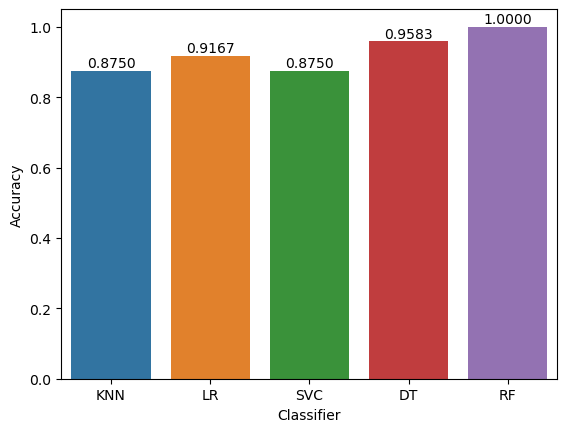

In [55]:
import seaborn as sns
axis = sns.barplot(x = 'Name', y = 'Score', data =tr_split )
axis.set(xlabel='Classifier', ylabel='Accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.01, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

# Exporting a model

In [56]:
import pickle

In [57]:
# Export the trained model using pickle
with open('logisticregression.pkl', 'wb') as f:
    pickle.dump(lr, f)

In [58]:
with open('KNeighborsClassifier.pkl', 'wb') as f:
    pickle.dump(lr, f)

In [59]:
with open('RandomForestClassifier.pkl', 'wb') as f:
    pickle.dump(lr, f)

In [60]:
with open('DecisionTreeClassifier.pkl', 'wb') as f:
    pickle.dump(lr, f)

In [61]:
with open('svc.pkl', 'wb') as f:
    pickle.dump(lr, f)